# Load Libraries 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load in dataset

In [2]:
df = pd.read_csv('mail_data.csv')
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

### Convert Email Category

In [4]:
binary_val = {"spam" : 1, "ham": 0}
df['Category'] = df['Category'].map(binary_val)

### Train Test Split 

In [5]:
# Splitting the data into training and testing sets
x = df['Message']
y = df['Category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)


# create TfidfVectorizer 
features = TfidfVectorizer(min_df= 1, stop_words= 'english', lowercase= True)

# transform the email content into a vector
x_train_features = features.fit_transform(x_train)
x_test_features = features.transform(x_test)

## Logistic Regression 

Logistic Regression Accuracy:  0.967713004484305


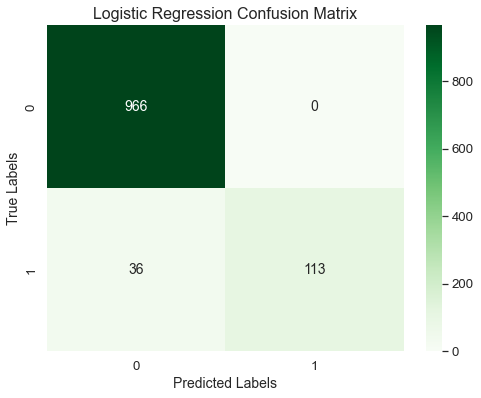

In [6]:
model = LogisticRegression()
model.fit(x_train_features, y_train)
prediction = model.predict(x_test_features)
LR_acc = accuracy_score(y_test, prediction)
print("Logistic Regression Accuracy: ", LR_acc)
LF_confMatr = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(LF_confMatr, annot=True, fmt='d', cmap='Greens', annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Logistic Regression Confusion Matrix', fontsize=16)
plt.show()

## Naive Bayes Classifier

Naive Bayes Classifier Accuracy:  0.9766816143497757


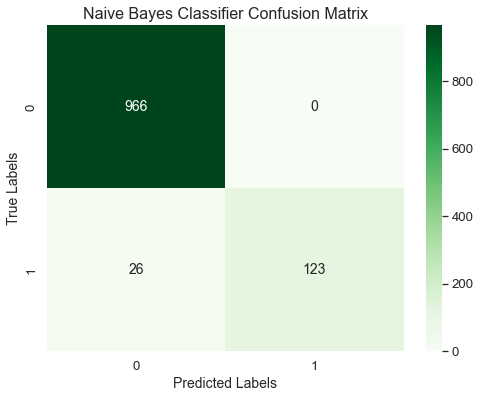

In [7]:
classifier = MultinomialNB().fit(x_train_features, y_train)
prediction = classifier.predict(x_test_features)
NBC_acc = accuracy_score(y_test, prediction)
print("Naive Bayes Classifier Accuracy: ", NBC_acc)
NBC_confMatr = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(NBC_confMatr, annot=True, fmt='d', cmap='Greens', annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Naive Bayes Classifier Confusion Matrix', fontsize=16)
plt.show()

# Conclusion 

Post training and evaluation, the Naive Bayes Classifier demonstrated superior performance in discerning spam emails compared to Logistic Regression, achieving an accuracy of 97.668% as opposed to 96.771% attained by the latter model.